## DanceVision– AI-driven Dance Proficiency Assessment

### Contents:
- [Background](#1-Background)
- [Data Collection and Exploration](#2-Data-Collection-and-Exploration)
- [Modeling](#3-Modeling)
- [Key Insights & Recommendations](#3-Conclusion)

## 1 Background

Dance is a universal language that transcends borders and cultures. It is not only a form of entertainment but also a medium for self-expression and communication. With the advent of technology, the way we perceive and interact with dance has evolved. The project at hand aims to leverage the power of machine learning and MediaPipe to detect and analyze dance poses, thereby determining the proficiency of a dancer. This technology can be utilized in various ways, such as an AI dance trainer, a tool for auditions, talent scouting, and entertainment.



#### Problem Statement

 There is a need for a more efficient, objective, and accessible method of evaluating dance performance. This project aims to address these challenges by developing a machine learning model that can accurately detect and analyze dance poses. The model will compare a dancer's poses with those of a professional dancer, providing an objective assessment of their performance. 

#### Research

The online learning market has been rapidly expanding; in 2019, it was a USD 144 B industry, and by 2026, is expected to reach USD 374.3 B [1](#1) The impact of COVID-19 on dance education has been significant, with many institutions forced to close their doors and move their classes online. This has led to a surge in interest in online dance classes and the use of technology in dance education. However, the transition to online learning has also highlighted the limitations of current approaches, particularly in terms of providing effective feedback and supporting independent practice.

(In the online environment, it is especially challenging to learn body activities, such as dancing or playing sports. For example, watching and following videos on YouTube provide convenient and easy opportunities to learn dance for beginners. However, the interactions between students and teachers are limited in this environment. Unlike offline dance classes where teachers and students are co-located simultaneously, beginners may not easily grasp visual cues in tutorial videos, and compare their movements with those in the videos.)

Moreover, the global dance and electronic music market revenue was estimated to be around 7.1 billion U.S. dollars in 2019 [2](#2), indicating a substantial market for this technology. Specifically, in South Korea, the K-pop industry is known for its rigorous dance routines and synchronization between band members. It is commonly used as a metrics in auditions as well. However, the time-consuming nature of traditional auditions may be taking up resources for entertainment companies and also applicants. These auditions often require significant travel and preparation time, making them inaccessible for many potential students. Additionally, the audition process can be highly subjective, with decisions often based on a single performance. These issues may be alleviated with the use of AI dance assessment. Talent scouts can use it to scan through numerous online videos efficiently as well in search of suitable candidates.

Recent years have seen the growth of AI technologies in various domains, including dance. These technologies, such as human pose estimation models for 2D video, allow us to recognize dance movements and offer feedback to learners based on the captured movements. In addition, AI-based pose estimation is more lightweight and practical than other technologies for motion recognition, such as motion capture and Kinect, which are expensive, and have limited accessibility to being generally applied for students. Hence, this project aims to provide a light weight, accessible, one-of-its-kind time-specific AI dance trainer for all to use.

References:
<br>1. Facts & Factors. (2020). E-Learning Market. 
<br>2. Global dance and electronic music market revenue. Link: https://www.statista.com/statistics/270229/usage-duration-of-social-networks-by-country/

#### Method

**Pose Detection**

MediaPipe is an open-source framework developed by Google for building multimodal (video, audio, and sensor) applied machine learning pipelines.

In this project, we will be using their pose estimation solution for detecting key landmarks on the human body. These solutions utilize pre-trained models that have been trained on large datasets, and they can be used out-of-the-box to make predictions on new data - to track poses.


Given any visible body, MediaPipe library detects 33 different landmarks on the body and returns the X,Y,Z location in the image for each of the landmarks below.





![PoseLandMarks](./images/pose_landmarks.png)

Here, I extracted 12 landmarks with only x and y values to reduce noise. A pose label will then be assigned to each set of pose values. This will then be passed into the ML models for training.

<b>Right Arm</b>
Landmarks:  12, 14, 16

<b>Left Arm</b>
Landmarks: 11, 13, 15

<b>Right Leg</b>
Landmarks:  24, 26, 28

<b>Left Leg</b>
Landmarks: 23, 25, 27

## 2 Data Collection and Exploration

**Data collection: 01_pose_training_data.py**

`01_pose_training_data.py` captures data at one timeframe of a dance choreography video which are labelled as one pose. In this timeframe, 5 to 20 consecutive frames will be taken(<1second) and the 12 landmarks of interest from each frame will be collected as one set of observations (=one row of data).

For example, for 1 pose, 5 frames will give me 5 rows of data. Since there are 4 videos used as training set, the total number of frames collect for one pose will be 20 frames and hence 20 rows of data. For each landmark there are 2 values ( X, Y ), hence each frame will produce 24 values/features, along with the pose label.

The each set of pose values will be saved into a csv file.

Usage: 


python 01_training_data.py --class-name Hit --video-folder vid/raw --start-frame 38 --end-frame 56 --file-name pose_training_12pt.csv --select-random


In [46]:
# !pip install openpyxl

In [45]:
df.head()

,class_name,start_frame,end_frame,file_name,model_name
0,L-Up,38,56,training1.csv,model1
1,L-Up,84,97,training1.csv,model1
2,L-Up,420,434,training1.csv,model1
3,L-Up,467,483,training1.csv,model1
4,L-Down,69,77,training2.csv,model2


In [12]:
import pandas as pd
import subprocess
import os

def run_script(script, args=[]):
    subprocess.run(["python", script] + args, check=True)

df = pd.read_excel('data/key_poses.xlsx')
print(os.getcwd())

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    
    class_name = row['class_name']
    start_frame = row['start_frame']
    end_frame = row['end_frame']
    file_name = row['file_name']
    print('Class name: ' ,class_name, ' File saved:', file_name)

    args = ['--video-folder', str('vid/raw'),
        "--class-name", str(class_name), 
        "--start-frame", str(start_frame), 
        "--end-frame", str(end_frame), 
        "--file-name", str(file_name), 
        "--select-random"]
    
    # Run the script
    run_script("01_training_data.py", args)

c:\Users\jinji\Desktop\GA_J\DSI-SG-37 - Copy\Capstone Project\dance_c3
Class name:  L-Up  File saved: training1.csv
Class name:  L-Up  File saved: training1.csv
Class name:  L-Up  File saved: training1.csv
Class name:  L-Up  File saved: training1.csv
Class name:  L-Down  File saved: training2.csv
Class name:  L-Down  File saved: training2.csv
Class name:  L-Down  File saved: training2.csv
Class name:  L-Down  File saved: training2.csv
Class name:  L-Extend  File saved: training3.csv
Class name:  L-Extend  File saved: training3.csv
Class name:  L-Keep  File saved: training4.csv
Class name:  L-Keep  File saved: training4.csv
Class name:  L-Keep  File saved: training4.csv
Class name:  R-Extend  File saved: training5.csv
Class name:  R-Extend  File saved: training5.csv
Class name:  R-Keep  File saved: training6.csv
Class name:  R-Keep  File saved: training6.csv
Class name:  R-Up  File saved: training7.csv
Class name:  R-Up  File saved: training7.csv
Class name:  R-Up  File saved: training7

# Review Pose Data

In [26]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [27]:
df = pd.read_csv('./data/supershy_training_12pt.csv', header=None)
# Changing columns name with index number
df = df.rename(columns={
    df.columns[0]: 'target',
    1:'p11x',
    2:'p11y',
    3:'p12x',
    4:'p12y',
    5:'p13x',
    6:'p13y',
    7:'p14x',
    8:'p14y',
    9:'p15x',
    10:'p15y',
    11:'p16x',
    12:'p16y',
    13:'p23x',
    14:'p23y',
    15:'p24x',
    16:'p24y',
    17:'p25x',
    18:'p25y',
    19:'p26x',
    20:'p26y',
    21:'p27x',
    22:'p27y',
    23:'p28x',
    24:'p28y'
})

## Raw Collected Pose Data

In [35]:
df.shape

(405, 25)

In [29]:
df.sample(frac=0.05, replace=False, random_state=1)

,target,p11x,p11y,p12x,p12y,p13x,p13y,p14x,p14y,p15x,...,p24x,p24y,p25x,p25y,p26x,p26y,p27x,p27y,p28x,p28y
361,Hit,0.503050,0.419582,0.416040,0.414611,0.581769,0.377122,0.565155,0.366704,0.658263,...,0.412153,0.596647,0.543139,0.718073,0.350387,0.737964,0.573987,0.830337,0.275130,0.841092
62,Hit,0.533189,0.442137,0.452344,0.445124,0.639032,0.400441,0.584126,0.406648,0.642906,...,0.453835,0.597352,0.594969,0.706535,0.414527,0.718787,0.597082,0.812932,0.369997,0.823068
320,Hit,0.516810,0.459327,0.505952,0.444943,0.540951,0.515194,0.588879,0.383308,0.580958,...,0.479574,0.597164,0.541575,0.733155,0.412311,0.724134,0.550465,0.845990,0.297138,0.833496
92,Hit,0.515192,0.458072,0.444420,0.440142,0.579330,0.398837,0.556529,0.383716,0.629344,...,0.487831,0.619705,0.583745,0.757820,0.450874,0.757913,0.594270,0.879533,0.362966,0.877422
146,Miss,0.529120,0.417938,0.443346,0.415669,0.440571,0.371223,0.359429,0.354078,0.337499,...,0.423327,0.581829,0.554277,0.719643,0.301146,0.678487,0.598363,0.818809,0.327419,0.792805
292,Hit,0.525569,0.404123,0.495007,0.397034,0.593262,0.416326,0.614458,0.337485,0.615729,...,0.436914,0.563337,0.515209,0.699623,0.355171,0.701722,0.547543,0.810886,0.247410,0.815225
238,Hit,0.483170,0.457052,0.430825,0.445130,0.501993,0.532554,0.560279,0.408881,0.569739,...,0.466654,0.621661,0.562688,0.740640,0.432828,0.750742,0.549645,0.856688,0.316652,0.855822
296,Hit,0.519636,0.404974,0.489878,0.399595,0.601693,0.360763,0.599202,0.348494,0.667281,...,0.430535,0.568880,0.517743,0.697846,0.338478,0.698510,0.547251,0.808285,0.244911,0.812840
29,Hit,0.484219,0.403663,0.383849,0.408965,0.553994,0.362381,0.478277,0.369116,0.601451,...,0.379969,0.581254,0.546081,0.715429,0.348234,0.728652,0.565200,0.823092,0.283234,0.839835
172,Miss,0.402432,0.436768,0.269835,0.455657,0.493315,0.367383,0.129527,0.508854,0.576681,...,0.321310,0.609169,0.565974,0.709806,0.318391,0.742675,0.560715,0.830472,0.284802,0.836831


### Review the mean values for each of the columns

In [30]:
df.groupby('target').mean()

,p11x,p11y,p12x,p12y,p13x,p13y,p14x,p14y,p15x,p15y,...,p24x,p24y,p25x,p25y,p26x,p26y,p27x,p27y,p28x,p28y
target,,,,,,,,,,,,,,,,,,,,,
Hit,0.521063,0.434996,0.452048,0.428216,0.586606,0.403144,0.559816,0.380591,0.644546,0.361803,...,0.451901,0.593637,0.569916,0.713225,0.399128,0.720867,0.579428,0.822896,0.318687,0.826388
Miss,0.545620,0.436627,0.414545,0.436863,0.576220,0.439927,0.371165,0.434391,0.568603,0.417865,...,0.424980,0.590375,0.557316,0.713153,0.393533,0.713484,0.577753,0.809074,0.373149,0.814110


In [31]:
df.groupby('target').count()

,p11x,p11y,p12x,p12y,p13x,p13y,p14x,p14y,p15x,p15y,...,p24x,p24y,p25x,p25y,p26x,p26y,p27x,p27y,p28x,p28y
target,,,,,,,,,,,,,,,,,,,,,
Hit,260,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
Miss,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145


**Average values for the FIRST set of landmark**

Class: Successful

<Axes: >

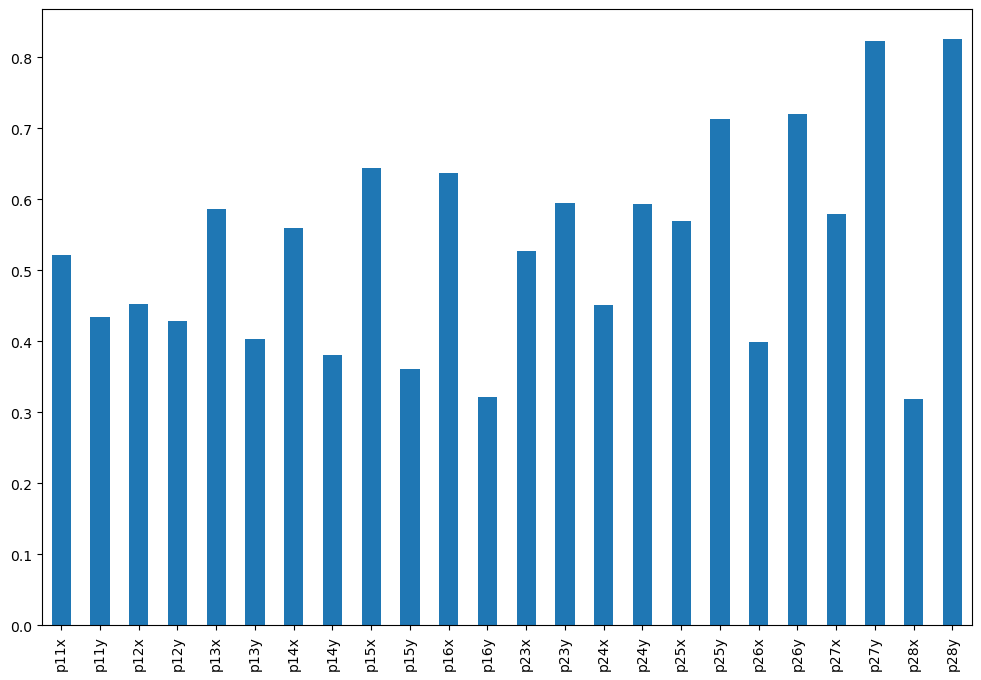

In [32]:
df.query("target == 'Hit'").mean(numeric_only=True).plot(kind='bar', figsize=(12,8))

Class: Failed

<Axes: >

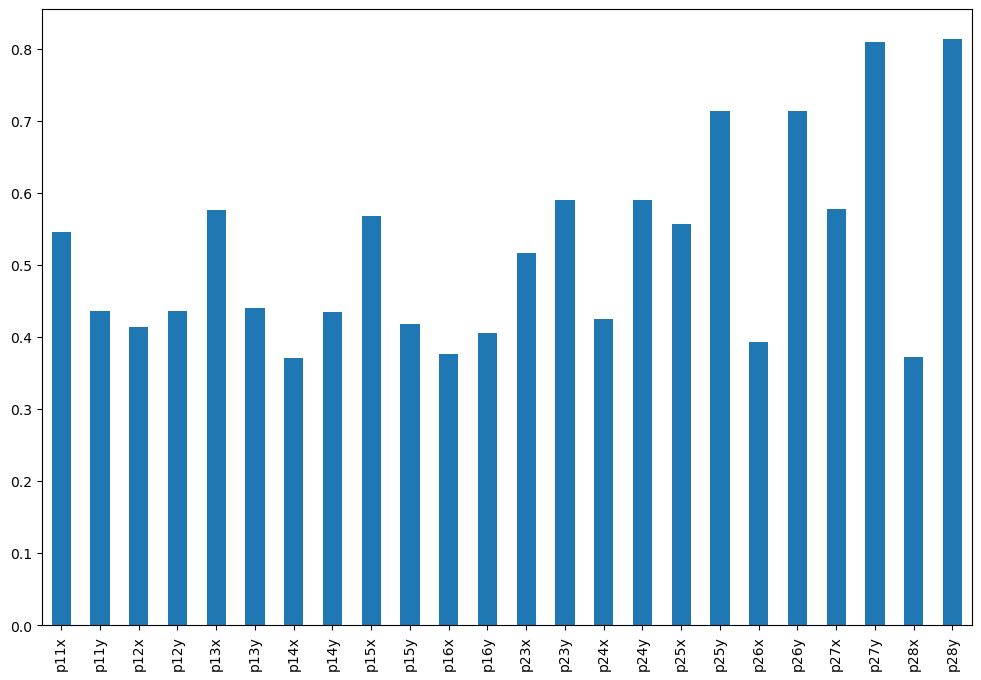

In [33]:
df.query("target == 'Miss'").mean(numeric_only=True).plot(kind='bar', figsize=(12,8))

Average values for each pose

<Axes: xlabel='target'>

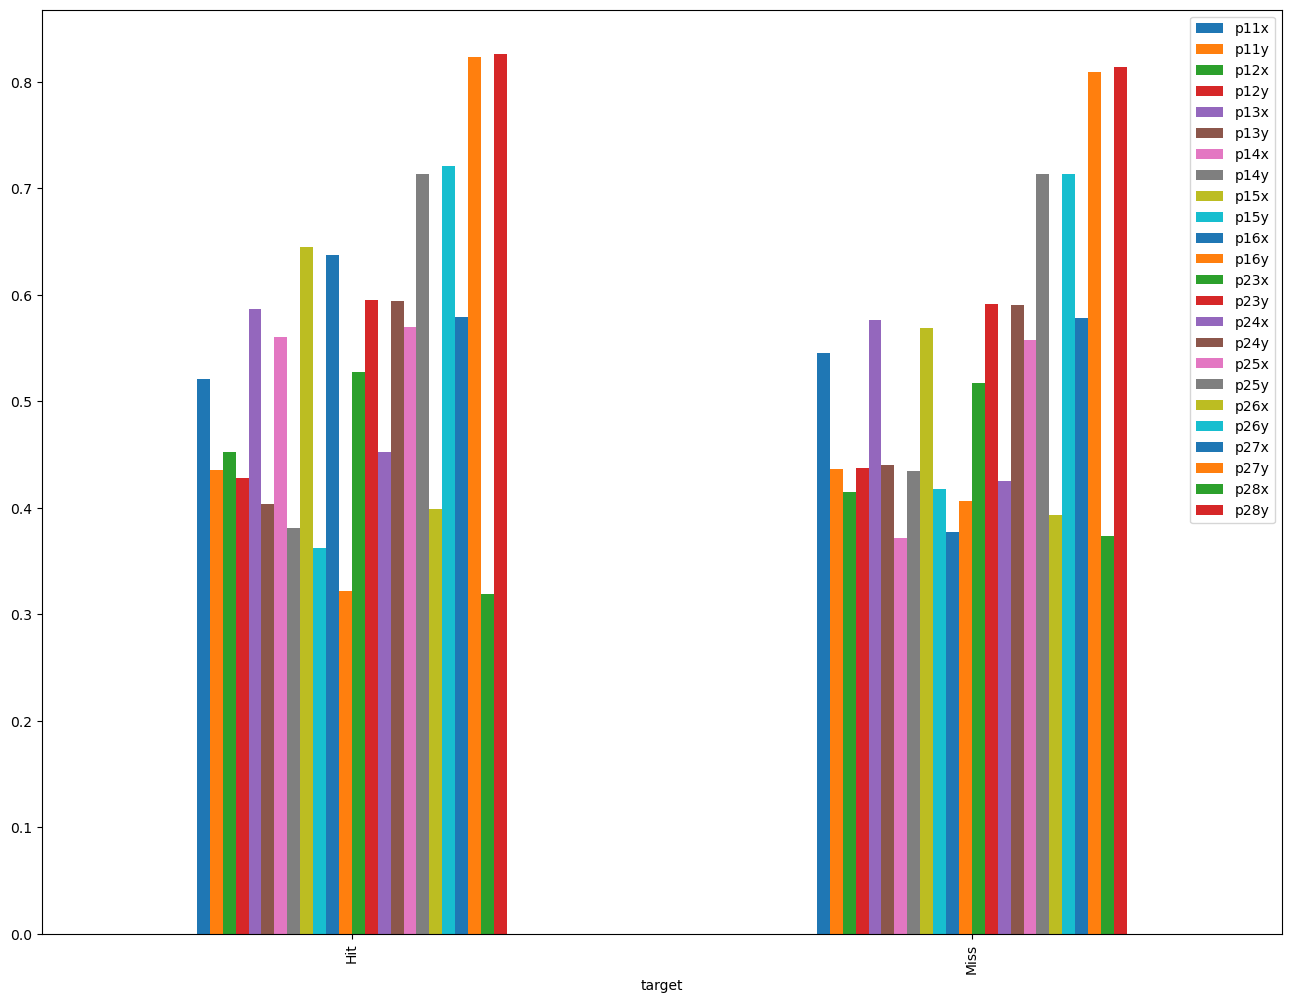

In [34]:
df.groupby('target').mean(numeric_only=True).plot(kind='bar', figsize=(16,12))

## Review Collected Data

In [24]:
def draw_pose_data(target_label):
    f, axarr = plt.subplots(1,2,figsize=(20,20))
    pose_image = cv2.imread(f'./data/{target_label}.png')
    img = cv2.cvtColor(pose_image, cv2.COLOR_BGR2RGB)
    axarr[0].imshow(img)
    
    x_y_values = [(1,2), (4,5), (7,8), (10,11), (13,14), (16,17)]
    down_points = df.query(f'target == "{target_label}"')
    for down_point in down_points.iterrows():
        for x_y in x_y_values:
            x,y = list(down_point[1].values[x_y[0]: x_y[1]+1])
            img_x, img_y = pose_image.shape[1]*x, pose_image.shape[0]*y
            img = cv2.circle(img, (int(img_x),int(img_y)), 2, (255,0,0), 2)

    axarr[1].imshow(img)

In [47]:
# draw_pose_data('Miss')

## 3 Modeling

Now that we have a dataset we can start to train a model to predict the target value

`02_pose_model_training.py` runs through a series of Sckit-Learn models with GridSearchCV and saves the best model. 

In [43]:

df = pd.read_excel('data/key_poses.xlsx')
print(os.getcwd())
# Drop duplicates for file_name and model_name columns
df_unique = df[['file_name', 'model_name']].drop_duplicates()

# Iterate over the unique combinations of file_name and model_name
for index, row in df_unique.iterrows():

    file_name = row['file_name']
    model_name = row['model_name']
    print('file_name', file_name, 'model_name', model_name)
    # Create arguments for the script
    args = ['--training-data', str(file_name), 
            "--model-name", str(model_name)]
    

    run_script("02_pose_model_training.py", args)

c:\Users\jinji\Desktop\GA_J\DSI-SG-37 - Copy\Capstone Project\dance_c3
file_name training1.csv model_name model1
file_name training2.csv model_name model2
file_name training3.csv model_name model3
file_name training4.csv model_name model4
file_name training5.csv model_name model5
file_name training6.csv model_name model6
file_name training7.csv model_name model7
file_name training8.csv model_name model8
file_name training9.csv model_name model9
file_name training10.csv model_name model10


**Summarising the evaluation metrics**

In [37]:
import os
import glob
import pandas as pd
import io
import ast


subfolder = 'model'
file_pattern = 'model*_metadata.txt'

# Generate a list of all relevant text files
file_list = glob.glob(os.path.join(subfolder, file_pattern))

df_all = pd.DataFrame()



for file in file_list:
    print('\n File_list:', file_list)
    print('File:', file)

    with open(file, 'r') as f:
        content = f.read()

    # Find the start and end indices of the scoring metrics
    start_index = content.find("{'Model Name'")
    end_index = content.find("}\n", start_index) + 1  # include the closing brace

    # Extract the scoring metrics and convert them to a DataFrame
    dict_str = content[start_index:end_index]
    dict_data = ast.literal_eval(dict_str)
    df = pd.DataFrame([dict_data])
    print('\n dict_data:')
    print(dict_data)

    # Append the DataFrame to the main DataFrame
    df_all = pd.concat([df_all, df])

# Calculate the mean and standard deviation for each model and metric
df_agg = df_all.groupby('Model Name').agg(['mean', 'std'])

# Format the final DataFrame
df_final = df_agg.apply(lambda row: ['{:.2f} ± {:.2f}'.format(mean, std) if not pd.isna(std) else '{:.2f}'.format(mean) for mean, std in zip(row[::2], row[1::2])], axis=1)

# Convert the final Series to DataFrame
df_final = df_final.apply(pd.Series)

# Create a MultiIndex for the columns to match df_agg
df_final.columns = pd.MultiIndex.from_product([df_agg.columns.get_level_values(0).unique(), ['mean ± std']])

df_final



 File_list: ['model\\model10_metadata.txt', 'model\\model1_metadata.txt', 'model\\model2_metadata.txt', 'model\\model3_metadata.txt', 'model\\model4_metadata.txt', 'model\\model5_metadata.txt', 'model\\model6_metadata.txt', 'model\\model7_metadata.txt', 'model\\model8_metadata.txt', 'model\\model9_metadata.txt']
File: model\model10_metadata.txt

 dict_data:
{'Model Name': 'KNN GridSearch', 'Training Score (CV)': 0.8333333333333334, 'Accuracy': 0.75, 'Precision': 0.75, 'Recall': 0.75, 'F1 Score': 0.75, 'Log Loss': 9.010913347279288, 'ROC AUC': 0.75}

 File_list: ['model\\model10_metadata.txt', 'model\\model1_metadata.txt', 'model\\model2_metadata.txt', 'model\\model3_metadata.txt', 'model\\model4_metadata.txt', 'model\\model5_metadata.txt', 'model\\model6_metadata.txt', 'model\\model7_metadata.txt', 'model\\model8_metadata.txt', 'model\\model9_metadata.txt']
File: model\model1_metadata.txt

 dict_data:
{'Model Name': 'KNN GridSearch', 'Training Score (CV)': 0.8162393162393163, 'Accurac

,Training Score (CV),Accuracy,Precision,Recall,F1 Score,Log Loss,ROC AUC
,mean ± std,mean ± std,mean ± std,mean ± std,mean ± std,mean ± std,mean ± std
Model Name,,,,,,,
DecisionTree,0.80,0.71,0.71,0.71,0.71,5.44,0.65
GradientBoostingClassifier,0.86 ± 0.03,0.80 ± 0.07,0.80 ± 0.07,0.80 ± 0.07,0.80 ± 0.07,0.54 ± 0.12,0.87 ± 0.05
KNN GridSearch,0.84 ± 0.02,0.81 ± 0.04,0.81 ± 0.04,0.81 ± 0.04,0.81 ± 0.04,4.82 ± 3.43,0.81 ± 0.05
LogisticRegression,0.81,0.89,0.89,0.89,0.89,0.38,0.89


In [30]:
import os
import glob
import pandas as pd
import io
import ast

# Define the subfolder and the naming pattern for the text files
subfolder = 'model'
file_pattern = 'model*_metadata.txt'

# Generate a list of all relevant text files
file_list = glob.glob(os.path.join(subfolder, file_pattern))

# Initialize an empty DataFrame to store the data from all files
df_all = pd.DataFrame()

# Loop over all files
for file in file_list:
    # Open the file and read its content
    with open(file, 'r') as f:
        content = f.read()

    # Find the start and end indices of the scoring metrics
    start_index = content.find("{'Model Name'")
    end_index = content.find("}\n", start_index) + 1  # include the closing brace

    # Extract the scoring metrics and convert them to a DataFrame
    dict_str = content[start_index:end_index]
    dict_data = ast.literal_eval(dict_str)
    df = pd.DataFrame([dict_data])

    # Append the DataFrame to the main DataFrame
    df_all = pd.concat([df_all, df])

# Calculate the mean and standard deviation for each model and metric
df_mean = df_all.groupby('Model Name').mean()
df_std = df_all.groupby('Model Name').std()

# Replace NaN values in df_std with 0
df_std.fillna(0, inplace=True)

# Create a DataFrame that combines the mean and standard deviation
df_final = df_mean.astype(str) + ' ± ' + df_std.astype(str)

df_final


,Training Score (CV),Accuracy,Precision,Recall,F1 Score,Log Loss,ROC AUC
Model Name,,,,,,,
DecisionTree,0.8034552845528454 ± 0.0,0.7142857142857143 ± 0.0,0.7142857142857143 ± 0.0,0.7142857142857143 ± 0.0,0.7142857142857143 ± 0.0,5.438054886900242 ± 0.0,0.6499999999999999 ± 0.0
GradientBoostingClassifier,0.8574491405674142 ± 0.034527153456120445,0.7984648453398453 ± 0.06609559190773584,0.7984648453398453 ± 0.06609559190773584,0.7984648453398453 ± 0.06609559190773584,0.7984648453398453 ± 0.06609559190773584,0.5369557786732654 ± 0.11916198050734943,0.8721215422195814 ± 0.051695445997631886
KNN GridSearch,0.8426771462227977 ± 0.023459540858108915,0.8116550116550116 ± 0.0412913229181385,0.8116550116550116 ± 0.0412913229181385,0.8116550116550116 ± 0.0412913229181385,0.8116550116550116 ± 0.0412913229181385,4.8228134568322965 ± 3.4270765585413074,0.8099624060150377 ± 0.04658039871434428
LogisticRegression,0.8101112723754232 ± 0.0,0.8888888888888888 ± 0.0,0.8888888888888888 ± 0.0,0.8888888888888888 ± 0.0,0.8888888888888888 ± 0.0,0.37577439931327405 ± 0.0,0.8923076923076922 ± 0.0


**Model Prediction**

``03_pose_predictions.py`` processes new input video and based on the pre-assigned timeframe and models, it access the user's pose based on timestamp.

In [14]:
%%bash
python 03_pose_predictions.py

dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0. 0. 0. 1.]
dance [0. 0

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2021-12-17 11:14:56.779 Python[3368:402358] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)
